In [8]:
# imports
import pandas as pd
import pybaseball as pb
# enable caching
pb.cache.enable()

In [9]:
# look up Trevor Rogers id
pb.playerid_lookup("Rogers", "Trevor")

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,rogers,trevor,669432,roget003,rogertr01,-1,2020.0,2021.0


In [12]:
# gather all the statcast for the pitcher
# use the key_mlbam value to identify the pitcher
rogers_statcast_df = pb.statcast_pitcher(start_dt="2019-01-01", end_dt='2021-4-28', player_id=669432)

Gathering Player Data


In [33]:
# anything in here?
rogers_statcast_df.shape

(1253, 92)

In [10]:
# look up Byron Buxton id
pb.playerid_lookup("Buxton", "Byron")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,buxton,byron,621439,buxtb001,buxtoby01,14161,2015.0,2021.0


In [30]:
# gather all the statcast for the pitcher
# use the key_mlbam value to identify the pitcher
buxton_statcast_df = pb.statcast_batter(start_dt="2019-01-01", end_dt='2021-4-28', player_id=621439)

Gathering Player Data


In [31]:
# check the dimentions of the dataframe to make sure we got something
buxton_statcast_df.shape

(1820, 92)

In [42]:
buxton_statcast_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CU,2021-04-27,78.8,-0.60,6.25,"Buxton, Byron",621439,650644,home_run,hit_into_play,...,5,4,5,4,5,Infield shift,Standard,44.0,-0.083,1.000
1,SL,2021-04-27,83.8,-0.66,6.10,"Buxton, Byron",621439,650644,field_out,hit_into_play,...,3,3,3,3,3,Infield shift,Standard,94.0,0.014,-0.096
2,SL,2021-04-27,83.6,-0.73,6.08,"Buxton, Byron",621439,650644,NaN,ball,...,3,3,3,3,3,Infield shift,Standard,93.0,0.000,0.018
3,FF,2021-04-27,91.5,-0.56,6.19,"Buxton, Byron",621439,650644,NaN,ball,...,3,3,3,3,3,Infield shift,Standard,192.0,0.000,0.011
4,SL,2021-04-27,84.0,-0.63,6.13,"Buxton, Byron",621439,650644,NaN,foul_tip,...,3,3,3,3,3,Infield shift,Standard,100.0,0.000,-0.027


## How to do a pitcher vs batter statcast search

In [25]:
# look up Brandon Nimmo
pb.playerid_lookup("Nimmo", "Brandon")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,nimmo,brandon,607043,nimmb001,nimmobr01,12927,2016.0,2021.0


In [26]:
# now filter down the dataframe to only pitches to the batter
# again using the key_mlbam value for the batter
rogers_vs_nimmo = rogers_statcast_df.query("batter == 607043")

In [29]:
# what does it look like?
rogers_vs_nimmo.shape

(28, 92)

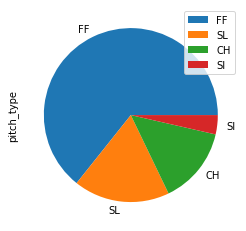

In [41]:
# simple plot as an example
rogers_vs_nimmo.pitch_type.value_counts().plot(kind="pie", legend=True)